<a href="https://colab.research.google.com/github/youngchanseo/Hon.Gong.Machine-SNU/blob/main/(03_2_1)_k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83%EC%9D%98_%ED%95%9C%EA%B3%84_p130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#http://bit.ly/perch_data
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
from sklearn.model_selection import train_test_split

#훈련세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

#훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [7]:
#최근접 이웃 개수를 3으로 하는 모델을 훈련. (3장 1절에서 했던 내용)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

#이 모델을 사용해 길이가 50cm인 농어의 무게를 예측
print(knr.predict([[50]]))
#실제 이 농어의 무게는 더 많이 나간다고함 > 문제는..?

[1033.33333333]


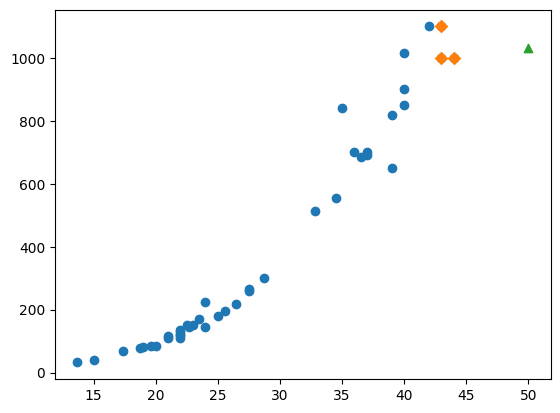

In [9]:
#산점도 표시

import matplotlib.pyplot as plt

#50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker ='D')

#50cm 농어 데이터
plt.scatter (50, 1033, marker ='^')
plt.xlabel=('length')
plt.ylabel=('weight')
plt.show()

길이가 50cm, 무게가 1,033g (예측된 무게)인 농어: 초록색, marker ='^'
해당 농어의 주변 샘플: 50g marker ='D'
50cm 농어 근처에서 가장 가까운 것은 45cm 근방이기에, k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균한다.

In [11]:
# 50cm농어 이웃샘플(주황색) target의 평균을 구해보면
print(np.mean(train_target[indexes]))

1033.3333333333333


In [14]:
print(knr.predict([[100]]))

[1033.33333333]


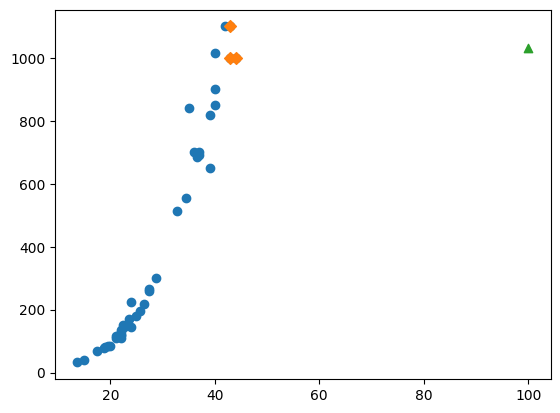

In [17]:
# 100cm 농어를 그래프로 그려보자

#100cm 농어의 이웃을 구함

import matplotlib.pyplot as plt

#100cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[100]])

#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker ='D')

#100cm 농어 데이터
plt.scatter (100, 1033, marker ='^')
plt.xlabel=('length')
plt.ylabel=('weight')
plt.show()

이런식이면 농어의 길이가 아무리 커도 예측되는 무게는 더이상 늘어나지 않음